## Collect weather data for 500 cities and plot

In [438]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from ratelimit import limits
import openweathermapy.core as owm

## Create Base URL

In [420]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

## Add API Key

In [421]:
# Import API key
api_key = "852305aaf0b662497d868eb7f882c53a"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Collect List of Random Cities using Citipy

In [440]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [441]:
# List for holding lat_lngs and cities and json responses
lat_lngs = []
cities = []
json_response = []

In [442]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5)
lat_lngs = zip(lats, lngs)

In [443]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

In [444]:
# Print the city count to confirm sufficient count
print(len(cities))
cities_df = pd.DataFrame(cities)
cities_df.columns = ['city']
print(cities_df.head())
print(cities)

5
          city
0      paamiut
1      mataura
2  valley city
3     zhigansk
4        alofi
['paamiut', 'mataura', 'valley city', 'zhigansk', 'alofi']


## Build Query

In [445]:
# Build partial query URL
url =  f"{url}appid={api_key}&units={units}&q="

## Create placeholders for data

In [447]:
# set up lists to hold reponse info
lat_d = []
temp = []
clouds = []
humid = []
countries = []
wind = []
lng_d = []

## Loop through cities

In [430]:
# Loop through the list of cities and perform a request for data on each

print(f"Beginning Weather Data Collection")
print(f"*************************************************")


for city in cities:
   
    try:
        response = requests.get(url + city).json()
        print(f"Collecting weather data for {city}...please stand by")
        
    
     #Append lists 
        json_response.append(response)
        lat_d.append(response['coord']['lat'])     
        lng_d.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        countries.append(response['sys']['country'])
        wind.append(response['wind']['speed'])
 
       
   
        # create a data frame from cities, lat, and temp
        weather_dict = {
            "city": cities,
            "lat": lat_d,
            "long": lng_d,
            "countries": countries,
            "temp": temp,
            "clouds": clouds,
            "humidity": humid, 
            "windspeed_mph": wind
            }
    except KeyError:
        print("Data not found....skipping")      

print("done")

Beginning Weather Data Collection
*************************************************
done


## Create dictionary with data

In [448]:
weather_dict

{'city': ['yellowknife',
  'hilo',
  'vila franca do campo',
  'khatanga',
  'jamestown'],
 'lat': [62.45, 19.71, 37.72, 71.98, -33.21],
 'long': [-114.38, -155.08, -25.43, 102.47, 138.6],
 'countries': ['CA', 'US', 'PT', 'RU', 'AU'],
 'temp': [-5.81, 77, 55.4, -11.34, 70.56],
 'clouds': [90, 20, 20, 68, 0],
 'humidity': [76, 68, 76, 74, 82],
 'windspeed_mph': [10.29, 6.93, 5.82, 7.96, 5.17]}

In [449]:
#Create dataFrame
weather_df = pd.DataFrame.from_dict(weather_dict)
weather_df

,city,lat,long,countries,temp,clouds,humidity,windspeed_mph
0,yellowknife,62.45,-114.38,CA,-5.81,90,76,10.29
1,hilo,19.71,-155.08,US,77.00,20,68,6.93
2,vila franca do campo,37.72,-25.43,PT,55.40,20,76,5.82
3,khatanga,71.98,102.47,RU,-11.34,68,74,7.96
4,jamestown,-33.21,138.60,AU,70.56,0,82,5.17


## Plot Data

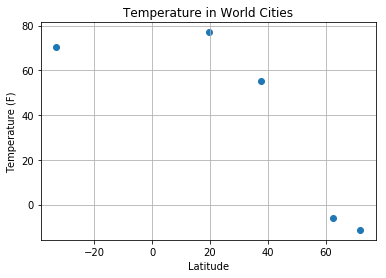

In [450]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

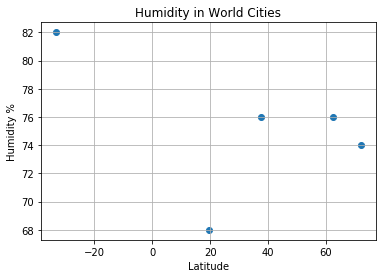

In [433]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

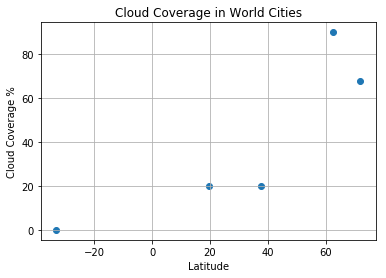

In [434]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Coverage in World Cities")
plt.ylabel("Cloud Coverage %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot
plt.show()

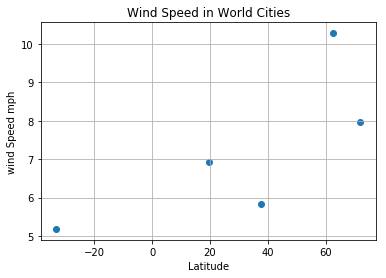

In [435]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["windspeed_mph"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windInWorldCities.png")

# Show plot
plt.show()